In [ ]:
import numpy as np
import sklearn
# fetch_20newsgroups is the built-in dataset loader for "20 newsgroups" from scikit-learn package
from sklearn.datasets import fetch_20newsgroups
# traning set
newsgroups_train = fetch_20newsgroups(subset='train')
# all data set
newsgroups_all = fetch_20newsgroups()
import matplotlib.pyplot as plt

In [ ]:
cate_sum = np.zeros(20)
for i in range(0, len(newsgroups_train.target) - 1):
  cate_sum[newsgroups_all.target[i]] += 1

**Question1**

plot a histogram of the number of training documents for each of the 20 categories to check if they are evenly distributed.

<BarContainer object of 20 artists>

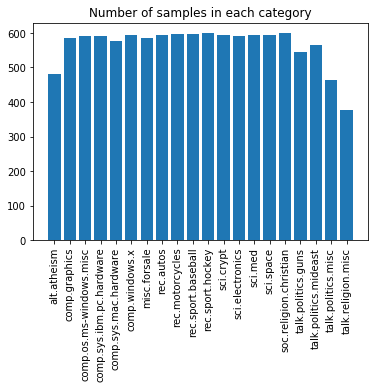

In [5]:
bar_name= range(0,20)
# print(bar_name)
x_tick = newsgroups_train.target_names
tick_marks = np.arange(len(x_tick))
plt.title('Number of samples in each category')
plt.xticks(tick_marks, x_tick, rotation=90)
# plt.yticks(tick_marks, y_tick)
plt.bar(bar_name,cate_sum)

**Question 2**

In [6]:
import numpy as np
np.random.seed(42)
import random
random.seed(42)

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import nltk
import re
from nltk.stem import WordNetLemmatizer 
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction import text
stop_words = text.ENGLISH_STOP_WORDS
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Load the data
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
               'comp.sys.mac.hardware', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = 42)
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = 42)

stop_dict = set(stop_words)

In [ ]:
def pre_processing(train_dataset, test_dataset, stop_dict):
        
    # Init the Wordnet Lemmatizer
    lemmatizer = WordNetLemmatizer() 
    analyzer = CountVectorizer().build_analyzer()


    def get_wordnet_pos(tag):
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            return wordnet.NOUN

    def stop_words(word):
        if word in stop_dict:
            return True
        else:
            return False

    def is_number(word):
        pattern = re.compile(r'^[-+]?[-0-9]\d*\.\d*|[-+]?\.?[0-9]\d*$')
        result = pattern.match(word)
        if result:
            return True
        else:
            return False

    def lemmatized(list_word):
        return [lemmatizer.lemmatize(word.lower(), pos = get_wordnet_pos(tag)) 
            for word, tag in pos_tag(list_word)]

    def lemmatized_remove_num(doc):
        return (word for word in lemmatized(analyzer(doc)) 
            if (not is_number(word)) and (not stop_words(word)))

    vectorizer = CountVectorizer(analyzer = lemmatized_remove_num, min_df = 3)
    processed_data_train = vectorizer.fit_transform(train_dataset.data) # input of fit_transform is a list
    processed_data_test = vectorizer.transform(test_dataset.data)
    return processed_data_train.toarray(), processed_data_test.toarray()


In [ ]:
processed_data_train, processed_data_test = pre_processing(train_dataset, test_dataset, stop_dict)
# processed_data_test=pre_processing(test_dataset, stop_dict)

In [10]:
print(processed_data_test.shape)
processed_data_train.shape

(3150, 16320)


(4732, 16320)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
transformer = TfidfTransformer()
tfidf_matrix_train = transformer.fit_transform(processed_data_train)
tfidf_matrix_test = transformer.transform(processed_data_test)

# print(tfidf_matrix.toarray())
print(np.shape(tfidf_matrix_train.toarray()))
print(np.shape(tfidf_matrix_test.toarray()))

(4732, 16320)
(3150, 16320)


 **Question3**

In [ ]:
from sklearn.decomposition import TruncatedSVD
def svd_processing(tfidf_matrix_train, tfidf_matrix_test):
    svd = TruncatedSVD(n_components=50, random_state=42)
    tfidf_matrix_LSI_train = svd.fit_transform(tfidf_matrix_train)
    tfidf_matrix_LSI_test = svd.transform(tfidf_matrix_test)
    print('Train LSI reduced set shape: ', tfidf_matrix_LSI_train.shape)
    print('Test LSI reduced set shape: ', tfidf_matrix_LSI_test.shape)
    Vk = svd.components_
    LSI_train_error=np.sum(np.array(tfidf_matrix_train - tfidf_matrix_LSI_train.dot(Vk))**2)
    LSI_test_error=np.sum(np.array(tfidf_matrix_test - tfidf_matrix_LSI_test.dot(Vk))**2)

    print('LSI_train_error',LSI_train_error)
    print('LSI_test_error',LSI_test_error)
    return tfidf_matrix_LSI_train, tfidf_matrix_LSI_test


In [13]:
tfidf_matrix_LSI_train, tfidf_matrix_LSI_test = svd_processing(tfidf_matrix_train, tfidf_matrix_test)

Train LSI reduced set shape:  (4732, 50)
Test LSI reduced set shape:  (3150, 50)
LSI_train_error 4106.983592089881
LSI_test_error 2834.860854585667


In [ ]:
from sklearn.decomposition import NMF
def NMF_processing(tfidf_matrix_train, tfidf_matrix_test):
    model = NMF(n_components=50, init='random', random_state=42)
    tfidf_matrix_NMF_W_train = model.fit_transform(tfidf_matrix_train)
    tfidf_matrix_NMF_W_test = model.transform(tfidf_matrix_test)
    tfidf_matrix_NMF_H_train = model.components_
    
    return tfidf_matrix_NMF_W_train, tfidf_matrix_NMF_W_test, tfidf_matrix_NMF_H_train


In [ ]:
W_train, W_test, H = NMF_processing(tfidf_matrix_train, tfidf_matrix_test)
NMF_train_error = np.sum(np.array(tfidf_matrix_train - W_train.dot(H))**2)
NMF_test_error = np.sum(np.array(tfidf_matrix_test - W_test.dot(H))**2)

In [16]:
print('NMF_train_error',NMF_train_error)
print('NMF_test_error',NMF_test_error)

NMF_train_error 4146.805754950223
NMF_test_error 2840.8641423351537


**Q4**

In [ ]:
#Match data and labels
def label_generation(data):
  y_train_label = []
  for i in data:
    if i <= 3:
      y_train_label.append(-1)
    else:
      y_train_label.append(1)  
  return y_train_label
#1 stands for the rec, -1 stands for comp

The block below is to plot the ROC_curve and print some metrics information.

In [ ]:
#y_test_label is the true value of y, y_pred is the result of the model prediction, probs is the probability of test, which is computed by clf.predict_proba(Xtest)
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
def metricsPrint2All(y_test_label, y_pred, probs):
#citation: this function is copied from website
    def plot_roc_curve(fpr, tpr):
        plt.plot(fpr, tpr, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
    # probs = probs[:,1]
    auc = roc_auc_score(y_test_label, probs)
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(y_test_label, probs)
    plot_roc_curve(fpr, tpr)
    # confusion matrix plotting
    cmArray = confusion_matrix(y_test_label, y_pred)
    plt.imshow(cmArray, cmap = plt.cm.Greens, interpolation='nearest')
    plt.title('Confusion Matrix')
    y_tick = ['Class I \n Actual','Class II \n Actual']
    x_tick = ['Class I \n Predict','Class II \n Predict']
    tick_marks = np.arange(len(y_tick))
    plt.xticks(tick_marks, x_tick, rotation = 45)
    plt.yticks(tick_marks, y_tick)
    plt.colorbar()
    plt.show()
    print('Confusion Matrix:', cmArray)
    print('Accuracy %.3f' %accuracy_score(y_test_label, y_pred))
    print('F1 score %.3f' %f1_score(y_test_label, y_pred))
    print('Recall score %.3f' %recall_score(y_test_label, y_pred))
    print('Precision score %.3f' %precision_score(y_test_label, y_pred) )

In [ ]:
#y_test_label is the true value of y, y_pred is the result of the model prediction, probs is the probability of test, which is computed by clf.predict_proba(Xtest)
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, average_precision_score
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
def metricsPrintAll(y_test_label, y_pred, probs):
#citation: this function is copied from website
  def plot_roc_curve(fpr, tpr):
      plt.plot(fpr, tpr, color='orange', label='ROC')
      plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
      plt.xlabel('False Positive Rate')
      plt.ylabel('True Positive Rate')
      plt.title('Receiver Operating Characteristic (ROC) Curve')
      plt.legend()
      plt.show()
  # probs = probs[:,1]
  auc = roc_auc_score(y_test_label, probs)
  print('AUC: %.2f' % auc)
  fpr, tpr, thresholds = roc_curve(y_test_label, probs)
  plot_roc_curve(fpr, tpr)
  def metricsPrintAll4Classes(y_test_label, y_pred):
    cmArray = confusion_matrix(y_test_label, y_pred)
    plt.imshow(cmArray, cmap = plt.cm.Greens, interpolation='nearest')
    plt.title('Confusion Matrix')
    y_tick = ['Class I \n Actual','Class II \n Actual']
    x_tick = ['Class I \n Predict','Class II \n Predict']
    tick_marks = np.arange(len(y_tick))
    plt.xticks(tick_marks, x_tick, rotation=45)
    plt.yticks(tick_marks, y_tick)
    plt.colorbar()
    plt.show()
    print('Confusion Matrix: \n', cmArray)
    print('Accuracy %.3f' %accuracy_score(y_test_label, y_pred))
    print('F1 score %.3f' %f1_score(y_test_label, y_pred))
    print('Recall score %.3f' %recall_score(y_test_label, y_pred))
    print('Precision score %.3f' %precision_score(y_test_label, y_pred))
  metricsPrintAll4Classes(y_test_label, y_pred)

Q4: SVM SoftMargin C = 0.0001

In [ ]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC
y_train_label = label_generation(train_dataset.target)
clf = LinearSVC(random_state=0, C=0.0001).fit(tfidf_matrix_LSI_train, y_train_label)
# clf = svm.SVC().fit(tfidf_matrix_LSI_train, y_train_label)
y_test_label = label_generation(test_dataset.target)
#probability of prediction
probs = clf.decision_function(tfidf_matrix_LSI_test)
y_pred = clf.predict(tfidf_matrix_LSI_test)


In [21]:
print('Accuracy', accuracy_score(y_test_label, y_pred))

Accuracy 0.6711111111111111


AUC: 0.99


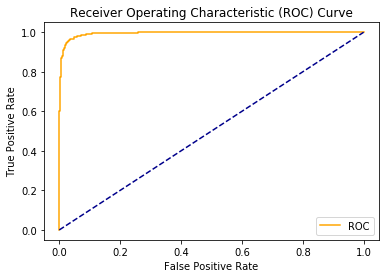

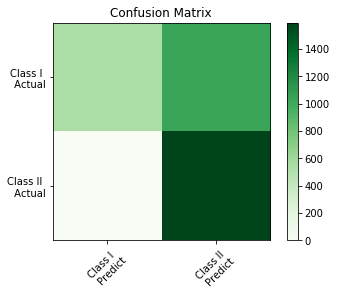

Confusion Matrix: 
 [[ 524 1036]
 [   0 1590]]
Accuracy 0.671
F1 score 0.754
Recall score 1.000
Precision score 0.605


In [52]:
metricsPrintAll(y_test_label, y_pred, probs)

SVM soft margin C = 1000

AUC: 1.00


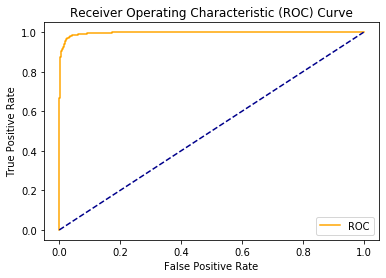

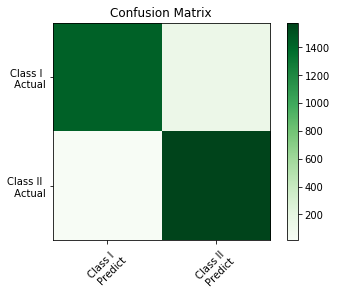

Confusion Matrix: 
 [[1430  130]
 [  14 1576]]
Accuracy 0.954
F1 score 0.956
Recall score 0.991
Precision score 0.924


In [50]:
clf = LinearSVC(random_state=0, C=1000).fit(tfidf_matrix_LSI_train, y_train_label)
probs = clf.decision_function(tfidf_matrix_LSI_test)
y_pred = clf.predict(tfidf_matrix_LSI_test)
metricsPrintAll(y_test_label, y_pred, probs)

SVM C crossvalidation.

In [49]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

cross_score = []
for i in range(-3, 4):
  clf = LinearSVC(random_state=0, C=10**i)
  
  cross_score.append(np.mean(cross_val_score(clf, X = tfidf_matrix_LSI_train, y = y_train_label, cv=5)))
print(cross_score)



[0.9412509962471898, 0.9695676343008186, 0.971469489720515, 0.9752738703059176, 0.9769652022298076, 0.9756971497842303, 0.9640714752941859]


SVM soft margin C = 10

AUC: 1.00


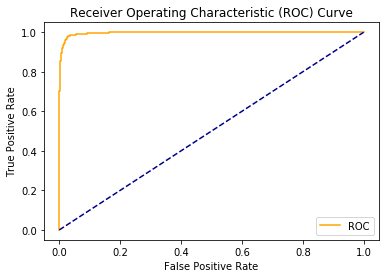

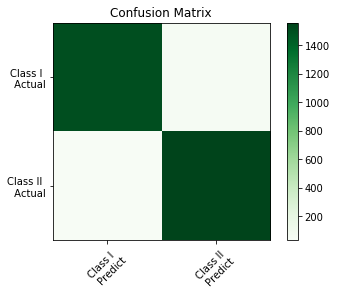

Confusion Matrix: 
 [[1508   52]
 [  32 1558]]
Accuracy 0.973
F1 score 0.974
Recall score 0.980
Precision score 0.968


In [25]:
clf = LinearSVC(random_state=0, C=10).fit(tfidf_matrix_LSI_train, y_train_label)
probs = clf.decision_function(tfidf_matrix_LSI_test)
y_pred = clf.predict(tfidf_matrix_LSI_test)
metricsPrintAll(y_test_label, y_pred, probs)

**Q5 Logistic Regression**


AUC: 1.00


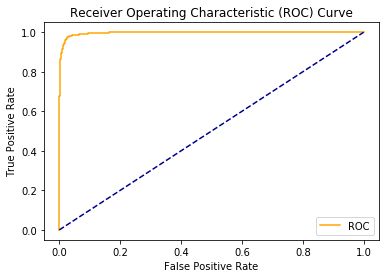

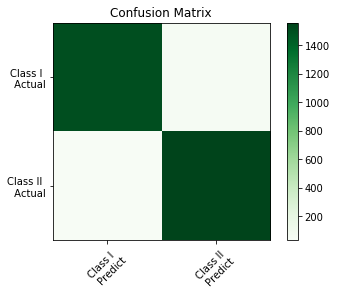

Confusion Matrix: 
 [[1507   53]
 [  32 1558]]
Accuracy 0.973
F1 score 0.973
Recall score 0.980
Precision score 0.967


In [26]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='none',random_state=42, solver='lbfgs').fit(tfidf_matrix_LSI_train, y_train_label)
probs = clf.predict_proba(tfidf_matrix_LSI_test)[:,1]
y_pred = clf.predict(tfidf_matrix_LSI_test)
metricsPrintAll(y_test_label, y_pred, probs)

5fold cross validation to choose the best regularization strength with L1 regulation and L2 regulation respectively.

In [27]:
from sklearn.linear_model import LogisticRegressionCV
Cs_list = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
# L1
clf_L1 = LogisticRegressionCV(cv=5, random_state=42, penalty='l1', Cs = Cs_list, solver='liblinear').fit(tfidf_matrix_LSI_train, y_train_label)
scores_L1 = clf_L1.scores_
scores_L1 = np.mean(scores_L1[1], axis = 0)
L1_best_index = np.argmax(scores_L1)
print("The best regularization strength with L1 is ", 1/Cs_list[L1_best_index])
# L2
clf_L2 = LogisticRegressionCV(cv=5, random_state=42, penalty='l2', Cs = Cs_list, solver='liblinear').fit(tfidf_matrix_LSI_train, y_train_label)
scores_L2 = clf_L2.scores_
scores_L2 = np.mean(scores_L2[1], axis = 0)
L2_best_index = np.argmax(scores_L2)
print("The best regularization strength with L2 is ", 1/Cs_list[L2_best_index])

The best regularization strength with L1 is  0.1
The best regularization strength with L2 is  0.01


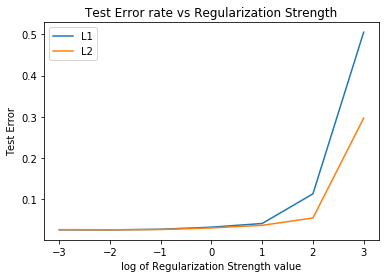

In [28]:
Cs_list = [1000, 100, 10, 1, 0.1, 0.01, 0.001]
score_L1_2 = []
score_L2_2 = []
for i in Cs_list:
  clf_L1_2 = LogisticRegressionCV(cv=5, random_state=42, penalty='l1', Cs=[i], solver='liblinear').fit(tfidf_matrix_LSI_train, y_train_label)
  score_L1_2.append(clf_L1_2.score(tfidf_matrix_LSI_test, y_test_label))
for i in Cs_list:
  clf_L2_2 = LogisticRegressionCV(cv=5, random_state=42, penalty='l2', Cs=[i], solver='liblinear').fit(tfidf_matrix_LSI_train, y_train_label)
  score_L2_2.append(clf_L2_2.score(tfidf_matrix_LSI_test, y_test_label))
# calculate the test error rate
plt.plot([-3,-2,-1,0,1,2,3], np.array([1,1,1,1,1,1,1])-np.asarray(score_L1_2), label='L1')
plt.plot([-3,-2,-1,0,1,2,3], np.array([1,1,1,1,1,1,1])-np.asarray(score_L2_2), label='L2')
plt.xlabel("log of Regularization Strength value")
plt.ylabel("Test Error")
plt.title("Test Error rate vs Regularization Strength")
plt.legend()
plt.show()

3 kinds of regularization comparison

----------------------None-------------------
AUC: 1.00


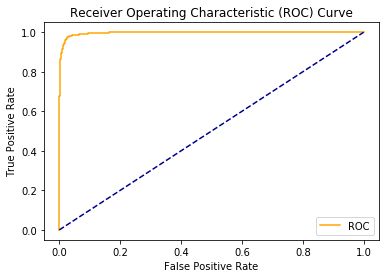

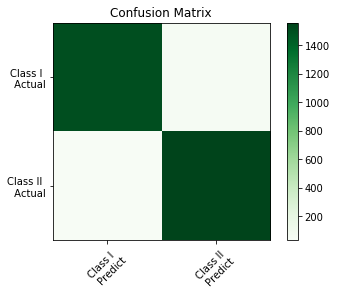

Confusion Matrix: 
 [[1507   53]
 [  32 1558]]
Accuracy 0.973
F1 score 0.973
Recall score 0.980
Precision score 0.967
----------------------l1-------------------
AUC: 1.00


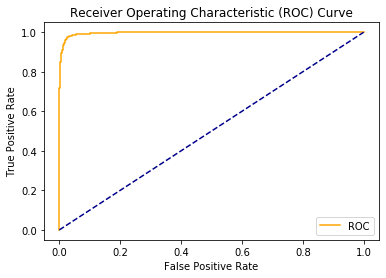

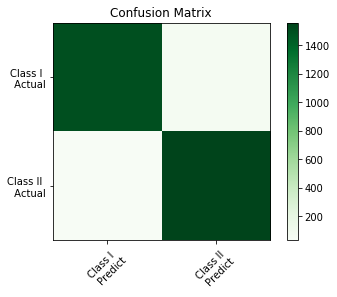

Confusion Matrix: 
 [[1504   56]
 [  32 1558]]
Accuracy 0.972
F1 score 0.973
Recall score 0.980
Precision score 0.965
----------------------l2-------------------
AUC: 1.00


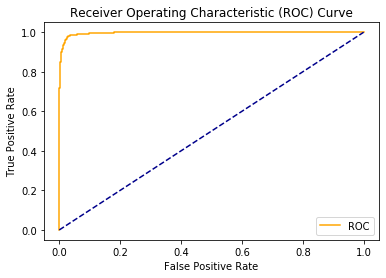

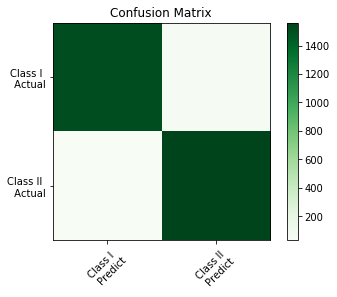

Confusion Matrix: 
 [[1507   53]
 [  31 1559]]
Accuracy 0.973
F1 score 0.974
Recall score 0.981
Precision score 0.967


In [29]:
from sklearn.linear_model import LogisticRegression
# without regularization
print('----------------------None-------------------')
clf_LR_Wo = LogisticRegression(penalty='none',solver='lbfgs').fit(tfidf_matrix_LSI_train, y_train_label)
probs = clf_LR_Wo.predict_proba(tfidf_matrix_LSI_test)[:,1]
y_pred = clf_LR_Wo.predict(tfidf_matrix_LSI_test)
metricsPrintAll(y_test_label, y_pred, probs)
# L1 regularization
print('----------------------l1-------------------')
clf_LR_L1 = LogisticRegression(C=10, penalty='l1', solver='liblinear').fit(tfidf_matrix_LSI_train, y_train_label)
probs = clf_LR_L1.predict_proba(tfidf_matrix_LSI_test)[:,1]
y_pred = clf_LR_L1.predict(tfidf_matrix_LSI_test)
metricsPrintAll(y_test_label, y_pred, probs)
# L2 regularization
print('----------------------l2-------------------')
clf_LR_L2 = LogisticRegression(C=100, penalty='l2', solver='liblinear').fit(tfidf_matrix_LSI_train, y_train_label)
probs = clf_LR_L2.predict_proba(tfidf_matrix_LSI_test)[:,1]
y_pred = clf_LR_L2.predict(tfidf_matrix_LSI_test)
metricsPrintAll(y_test_label, y_pred, probs)

**Q6**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import LinearSVC

In [ ]:
train_label = train_dataset.target > 3 # 4,5,6,7是recreation类
train_label = train_label.astype(int)
test_label = test_dataset.target > 3 # 0,1,2,3是computer类
test_label = test_label.astype(int)

In [ ]:
NBclr = GaussianNB()
NBclr.fit(tfidf_matrix_LSI_train, train_label)
test_pred = NBclr.predict(tfidf_matrix_LSI_test)
NB_scores_prob = NBclr.predict_proba(tfidf_matrix_LSI_test)[:, 1]

AUC: 0.97


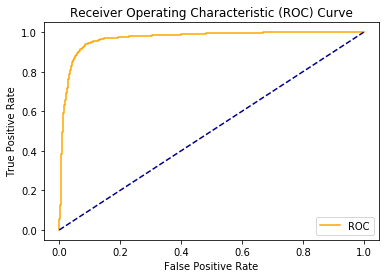

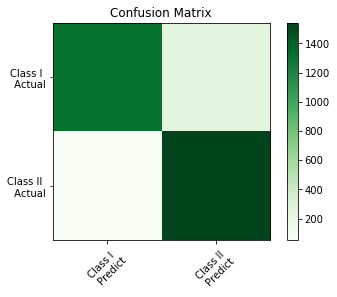

Confusion Matrix: [[1317  243]
 [  50 1540]]
Accuracy 0.907
F1 score 0.913
Recall score 0.969
Precision score 0.864


In [33]:
metricsPrint2All(test_label, test_pred, NB_scores_prob)

**Q7**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

N_FEATURES_OPTIONS = [50]
C_OPTIONS = [0.0001, 1000]

pipeline_grid = Pipeline([
    ('vector', CountVectorizer(analyzer = lemmatized_remove_num, min_df = 3)),
    ('tf-idf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('classify',LinearSVC())
])

param_grid = [ 
    {
        
        'vector__min_df': [3, 5],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42), NMF(n_components=50, init='random', random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [LinearSVC(C=10), 
                LogisticRegression(random_state=0, penalty='l1', solver='liblinear', C=10), 
                LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C=100), 
                GaussianNB()
                ]
        # 'classify__C': C_OPTIONS
    }
]

import pandas as pd

# grid = GridSearchCV(pipeline_grid, cv=2, n_jobs=1, param_grid=param_grid, scoring=make_scorer(my_score, greater_is_better=True, needs_proba=True))
grid = GridSearchCV(pipeline_grid, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train_dataset.data, y_train_label)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify,param_reduce_dim,param_reduce_dim__n_components,param_vector__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,48.317801,2.974696,11.867992,0.896139,"LinearSVC(C=10, class_weight=None, dual=True, ...","TruncatedSVD(algorithm='randomized', n_compone...",50,3,"{'classify': LinearSVC(C=10, class_weight=None...",0.972545,0.973601,0.971489,0.974630,0.976720,0.973795,0.001798,6
1,50.028594,1.447899,12.087153,1.284585,"LinearSVC(C=10, class_weight=None, dual=True, ...","TruncatedSVD(algorithm='randomized', n_compone...",50,5,"{'classify': LinearSVC(C=10, class_weight=None...",0.969377,0.975713,0.975713,0.972516,0.976720,0.974007,0.002715,5
2,56.578375,2.544255,11.509090,0.592143,"LinearSVC(C=10, class_weight=None, dual=True, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,3,"{'classify': LinearSVC(C=10, class_weight=None...",0.972545,0.965153,0.966209,0.968288,0.970370,0.968512,0.002697,9
3,62.779658,3.924687,13.395586,1.800534,"LinearSVC(C=10, class_weight=None, dual=True, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,5,"{'classify': LinearSVC(C=10, class_weight=None...",0.965153,0.969377,0.963041,0.963002,0.972487,0.966610,0.003742,11
4,47.530949,1.787481,12.029757,0.780499,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...",50,3,"{'classify': LogisticRegression(C=10, class_we...",0.972545,0.975713,0.977825,0.975687,0.978836,0.976120,0.002164,1
5,45.944997,0.488322,11.304754,0.680874,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...",50,5,"{'classify': LogisticRegression(C=10, class_we...",0.970433,0.973601,0.977825,0.974630,0.978836,0.975063,0.003021,2
6,59.737637,1.299051,11.854129,0.558143,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,3,"{'classify': LogisticRegression(C=10, class_we...",0.970433,0.971489,0.969377,0.964059,0.974603,0.969992,0.003442,8
7,60.170671,2.303011,12.152698,0.732368,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,5,"{'classify': LogisticRegression(C=10, class_we...",0.967265,0.974657,0.971489,0.966173,0.976720,0.971260,0.004079,7
8,46.695940,0.525966,11.748805,0.677987,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",50,3,"{'classify': LogisticRegression(C=100, class_w...",0.971489,0.975713,0.973601,0.975687,0.977778,0.974852,0.002139,3
9,50.540222,1.985290,13.629413,1.967213,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",50,5,"{'classify': LogisticRegression(C=100, class_w...",0.971489,0.975713,0.975713,0.973573,0.976720,0.974641,0.001881,4


In [ ]:
train_dataset = fetch_20newsgroups(subset = 'train', categories = categories, shuffle = True, random_state = 42,remove=('headers', 'footers'))
test_dataset = fetch_20newsgroups(subset = 'test', categories = categories, shuffle = True, random_state = 42, remove=('headers', 'footers'))


In [ ]:
N_FEATURES_OPTIONS = [50]
C_OPTIONS = [0.0001, 1000]

pipeline_grid = Pipeline([
    ('vector', CountVectorizer(analyzer = lemmatized_remove_num, min_df = 3)),
    ('tf-idf', TfidfTransformer()),
    ('reduce_dim', TruncatedSVD(n_components=50, random_state=42)),
    ('classify',LinearSVC())
])

param_grid = [ 
    {
        
        'vector__min_df': [3, 5],
        'reduce_dim': [TruncatedSVD(n_components=50, random_state=42), NMF(n_components=50, init='random', random_state=42)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify': [LinearSVC(C=10), 
                LogisticRegression(random_state=0, penalty='l1', solver='liblinear', C=10), 
                LogisticRegression(random_state=0, penalty='l2', solver='liblinear', C=100), 
                GaussianNB()
                ]
        # 'classify__C': C_OPTIONS
    }
]

import pandas as pd

# grid = GridSearchCV(pipeline_grid, cv=2, n_jobs=1, param_grid=param_grid, scoring=make_scorer(my_score, greater_is_better=True, needs_proba=True))
grid = GridSearchCV(pipeline_grid, cv=5, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(train_dataset.data, y_train_label)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classify,param_reduce_dim,param_reduce_dim__n_components,param_vector__min_df,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,40.688131,2.115553,10.160943,1.185513,"LinearSVC(C=10, class_weight=None, dual=True, ...","TruncatedSVD(algorithm='randomized', n_compone...",50,3,"{'classify': LinearSVC(C=10, class_weight=None...",0.959873,0.972545,0.966209,0.960888,0.970370,0.965976,0.005013,7
1,38.414668,1.332192,9.440266,0.665080,"LinearSVC(C=10, class_weight=None, dual=True, ...","TruncatedSVD(algorithm='randomized', n_compone...",50,5,"{'classify': LinearSVC(C=10, class_weight=None...",0.963041,0.973601,0.967265,0.958774,0.970370,0.966610,0.005246,4
2,54.626007,1.604888,10.719662,0.802512,"LinearSVC(C=10, class_weight=None, dual=True, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,3,"{'classify': LinearSVC(C=10, class_weight=None...",0.950370,0.967265,0.958817,0.956660,0.968254,0.960270,0.006721,11
3,47.136935,1.969215,9.387882,0.567306,"LinearSVC(C=10, class_weight=None, dual=True, ...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,5,"{'classify': LinearSVC(C=10, class_weight=None...",0.957761,0.961985,0.965153,0.957717,0.965079,0.961538,0.003307,9
4,37.279207,1.028014,9.165670,0.626450,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...",50,3,"{'classify': LogisticRegression(C=10, class_we...",0.964097,0.973601,0.966209,0.961945,0.971429,0.967456,0.004399,2
5,37.676699,0.849795,9.238283,0.683225,"LogisticRegression(C=10, class_weight=None, du...","TruncatedSVD(algorithm='randomized', n_compone...",50,5,"{'classify': LogisticRegression(C=10, class_we...",0.966209,0.973601,0.964097,0.963002,0.969312,0.967244,0.003839,3
6,52.213855,1.171028,10.081029,1.081558,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,3,"{'classify': LogisticRegression(C=10, class_we...",0.953537,0.969377,0.966209,0.958774,0.977778,0.965131,0.008412,8
7,48.060955,1.038024,9.842872,0.769614,"LogisticRegression(C=10, class_weight=None, du...","NMF(alpha=0.0, beta_loss='frobenius', init='ra...",50,5,"{'classify': LogisticRegression(C=10, class_we...",0.957761,0.970433,0.968321,0.960888,0.973545,0.966188,0.005929,6
8,38.027536,1.517974,9.417216,0.397052,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",50,3,"{'classify': LogisticRegression(C=100, class_w...",0.961985,0.975713,0.964097,0.960888,0.969312,0.966399,0.005485,5
9,39.597923,2.881872,9.573431,0.719705,"LogisticRegression(C=100, class_weight=None, d...","TruncatedSVD(algorithm='randomized', n_compone...",50,5,"{'classify': LogisticRegression(C=100, class_w...",0.964097,0.975713,0.969377,0.961945,0.969312,0.968090,0.004796,1


**Q8**

In [ ]:
# Load the data
categoriesQ8 = ['comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware','misc.forsale', 'soc.religion.christian']
train_datasetQ8 = fetch_20newsgroups(subset = 'train', categories = categoriesQ8, shuffle = True, random_state = 42)
test_datasetQ8 = fetch_20newsgroups(subset = 'test', categories = categoriesQ8, shuffle = True, random_state = 42)

stop_dict = set(stop_words)

In [ ]:
processed_data_trainQ8, processed_data_testQ8 = pre_processing(train_datasetQ8, test_datasetQ8, stop_dict)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
transformer = TfidfTransformer()
tfidf_matrix_trainQ8 = transformer.fit_transform(processed_data_trainQ8)
tfidf_matrix_testQ8 = transformer.transform(processed_data_testQ8)

# print(tfidf_matrix.toarray())
# np.shape(tfidf_matrix.toarray())

In [ ]:
from sklearn.decomposition import TruncatedSVD
def svd_processing(tfidf_matrix_train, tfidf_matrix_test):
    svd = TruncatedSVD(n_components=50, random_state=42)
    tfidf_matrix_LSI_train = svd.fit_transform(tfidf_matrix_train)
    tfidf_matrix_LSI_test = svd.transform(tfidf_matrix_test)
    print('Train SVD reduced set shape: ', tfidf_matrix_LSI_train.shape)
    print('Test SVD reduced set shape: ', tfidf_matrix_LSI_test.shape)
    Vk = svd.components_
    LSI_train_error=np.sum(np.array(tfidf_matrix_train - tfidf_matrix_LSI_train.dot(Vk))**2)
    LSI_test_error=np.sum(np.array(tfidf_matrix_test - tfidf_matrix_LSI_test.dot(Vk))**2)

    print('LSI_train_error',LSI_train_error)
    print('LSI_test_error',LSI_test_error)
    return tfidf_matrix_LSI_train, tfidf_matrix_LSI_test


In [41]:
tfidf_matrix_LSI_trainQ8, tfidf_matrix_LSI_testQ8 = svd_processing(tfidf_matrix_trainQ8, tfidf_matrix_testQ8)

Train SVD reduced set shape:  (2352, 50)
Test SVD reduced set shape:  (1565, 50)
LSI_train_error 1934.3413051803286
LSI_test_error 1369.5923233100186


The block below is to plot the ROC_curve and print some metrics information.

In [ ]:
#y_test_label is the true value of y, y_pred is the result of the model prediction, probs is the probability of test, which is computed by clf.predict_proba(Xtest)
from sklearn.metrics import confusion_matrix,accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
def metricsPrintAll4Classes(y_test_label, y_pred):
    cmArray = confusion_matrix(y_test_label, y_pred)
    plt.imshow(cmArray, cmap = plt.cm.Greens, interpolation='nearest')
    plt.title('Confusion Matrix')
    y_tick = ['Class I \n Actual','Class II \n Actual', 'Class III \n Actual', 'Class IV \n Acutal']
    x_tick = ['Class I \n Predict','Class II \n Predict', 'Class III \n Predict', 'Class IV \n Predict']
    tick_marks = np.arange(len(y_tick))
    plt.xticks(tick_marks, x_tick, rotation=45)
    plt.yticks(tick_marks, y_tick)
    plt.colorbar()
    plt.show()
    print('Confusion Matrix: \n', cmArray)
    print('Accuracy %.3f' %accuracy_score(y_test_label, y_pred))
    print('F1 score %.3f' %f1_score(y_test_label, y_pred, average='macro'))
    print('Recall score %.3f' %recall_score(y_test_label, y_pred, average='macro'))
    print('Precision score %.3f' %precision_score(y_test_label, y_pred, average='macro') )

 **Question8**

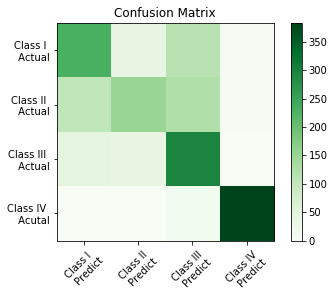

Confusion Matrix: 
 [[231  43 115   3]
 [106 152 124   3]
 [ 49  42 297   2]
 [  0   1  14 383]]
Accuracy 0.679
F1 score 0.671
Recall score 0.677
Precision score 0.689


In [42]:
from sklearn.naive_bayes import GaussianNB
clfNBQ8 = GaussianNB()
clfNBQ8.fit(tfidf_matrix_LSI_trainQ8, train_datasetQ8.target)
y_predNBQ8 = clfNBQ8.predict(tfidf_matrix_LSI_testQ8)
metricsPrintAll4Classes(test_datasetQ8.target, y_predNBQ8)

**OVO**

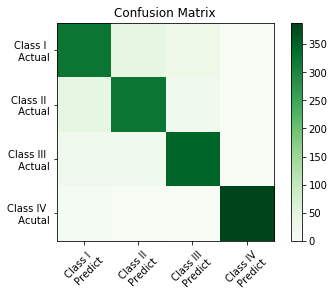

Confusion Matrix: 
 [[324  42  26   0]
 [ 42 324  18   1]
 [ 21  20 348   1]
 [  7   2   1 388]]
Accuracy 0.884
F1 score 0.884
Recall score 0.884
Precision score 0.884


In [43]:
from sklearn import svm
clfSVMOVO = svm.SVC(decision_function_shape='ovo')
clfSVMOVO.fit(tfidf_matrix_LSI_trainQ8, train_datasetQ8.target)
y_predSVMOVO = clfSVMOVO.predict(tfidf_matrix_LSI_testQ8)
metricsPrintAll4Classes(test_datasetQ8.target, y_predSVMOVO)

**OVR**

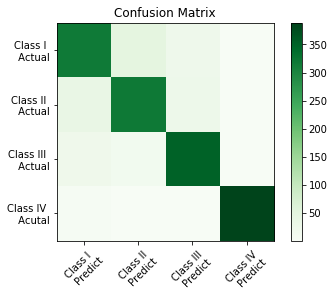

Confusion Matrix: 
 [[318  49  24   1]
 [ 38 319  26   2]
 [ 23  15 351   1]
 [  7   1   2 388]]
Accuracy 0.879
F1 score 0.879
Recall score 0.879
Precision score 0.879


In [44]:
lin_clf = svm.LinearSVC()
lin_clf.fit(tfidf_matrix_LSI_trainQ8, train_datasetQ8.target)
y_predSVMOVR = lin_clf.predict(tfidf_matrix_LSI_testQ8)
metricsPrintAll4Classes(test_datasetQ8.target, y_predSVMOVR) 